In [1]:
import numpy as np
import tensorflow as tf
import seaborn
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [2]:
X_data = np.arange(100, step = 0.05)
y_data = X_data + 20 *np.sin(X_data/10 + np.random.normal(0, 10))

In [3]:
n_samples = len(X_data)
batch_size = 200

In [4]:
X_data = (X_data - np.mean(X_data))/np.std(X_data)
y_data = (y_data - np.mean(y_data))/np.std(y_data)
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

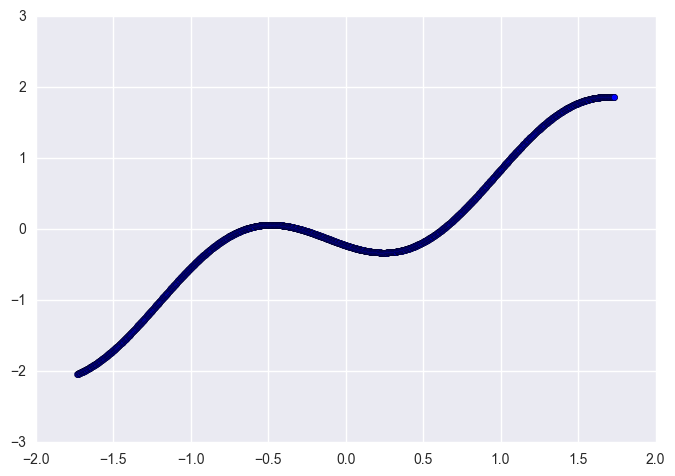

In [5]:
plt.scatter(X_data, y_data)
plt.show()

In [6]:
X = tf.placeholder(tf.float32, shape=(None, None))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

In [7]:
def model(X, W, B, p):
    
    
    h1 = tf.nn.relu(tf.matmul(X, W["1"])+B["1"])
    h1 = tf.nn.dropout(h1, p)
    
    h2 = tf.nn.relu(tf.matmul(h1, W["2"])+B["2"])
    h2 = tf.nn.dropout(h2, p)
    
    h3 = tf.nn.relu(tf.matmul(h2, W["3"])+B["3"])
    h3 = tf.nn.dropout(h3, p)
    
    h4 = tf.nn.relu(tf.matmul(h3, W["4"])+B["4"])
    h4 = tf.nn.dropout(h4, p)
    
    out = tf.matmul(h4, W["5"])+B["5"]
    
    return out

In [8]:

with tf.variable_scope("MLP"):

    n_neuron ={
        "input": 1,
        "h1": 100,
        "h2": 100,
        "h3": 100,
        "h4": 100,
        "output":1
    }

    W = {
        "1": tf.get_variable("weights1", (n_neuron["input"],n_neuron["h1"]), initializer = tf.random_normal_initializer(0, 0.01)),
        "2": tf.get_variable("weights2", (n_neuron["h1"],n_neuron["h2"]), initializer = tf.random_normal_initializer(0, 0.01)),
        "3": tf.get_variable("weights3", (n_neuron["h2"],n_neuron["h3"]), initializer = tf.random_normal_initializer(0, 0.01)),
        "4": tf.get_variable("weights4", (n_neuron["h3"],n_neuron["h4"]), initializer = tf.random_normal_initializer(0, 0.01)),
        "5": tf.get_variable("weights5", (n_neuron["h4"],n_neuron["output"]), initializer = tf.random_normal_initializer(0, 0.01)) 
    }

    B = {
        "1": tf.get_variable("bias1", (n_neuron["h1"]), initializer = tf.constant_initializer(0.5)),
        "2": tf.get_variable("bias2", (n_neuron["h2"]), initializer = tf.constant_initializer(0.5)),
        "3": tf.get_variable("bias3", (n_neuron["h3"]), initializer = tf.constant_initializer(0.5)),
        "4": tf.get_variable("bias4", (n_neuron["h4"]), initializer = tf.constant_initializer(0.5)),
        "5": tf.get_variable("bias5", (n_neuron["output"]), initializer = tf.constant_initializer(0.5))
    }

    p= 0.50
    
    y_pred = model(X, W, B, p)
    
    loss = tf.reduce_mean((y_pred-y)**2) + 0.0001*weight_decay

NameError: name 'weight_decay' is not defined

In [ ]:
opt = tf.train.AdamOptimizer().minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    for _ in range(15000):
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        
        _, loss_val= sess.run([opt, loss], feed_dict={X: X_batch, y: y_batch})
    
    prediction = sess.run(y_pred, feed_dict={X:X_data})

In [ ]:
plt.scatter(X_data, prediction, color='r')
plt.scatter(X_data, y_data)
plt.show()